In [316]:
import csv
import matplotlib.pyplot as plt
import math

In [317]:
description = {
    0:'0 other',
    1:'1 sleep',
    2:'2 job',
    3:'3 rest',
    4:'4 repair',
    5:'5 fitness',
    6:'6 hobby',
    7:'7 research',
    8:'8 lunch',
    9:'9 maintance',
    10:'10 family',
    11:'11 cleaning',
}
summary = {item:0 for item in description.values()}

In [318]:
with open("data/2020.07.09.txt") as fp:
    reader = csv.reader(fp, delimiter=";", quotechar='\n')
    data_read = [ [int(val) for val in row]  for row in reader]

In [319]:
pre = 0
for i in range(len(data_read)):
    if (i>0):
        job = description[data_read[i-1][1]]        
        time_spent = data_read[i][0]-pre
        if time_spent>2000:
            summary[job]+=time_spent
    pre = data_read[i][0]

In [320]:
empty_found = True
while empty_found:
    empty_found = False
    for rec in summary.keys():
        if summary[rec]==0:
            empty_found = True
            break
    if empty_found:
        summary.pop(rec)

In [321]:
labels = list(summary.keys())
values = list(summary.values())

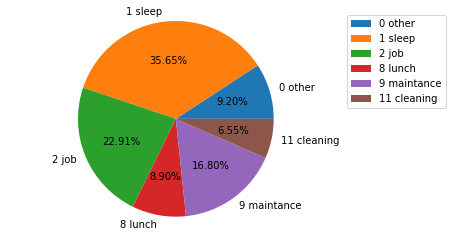

In [322]:
fig1, ax1 = plt.subplots()
 
wedges, texts, autotexts = ax1.pie(values, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [323]:
for item in summary.items():
    print(item[0],round(item[1]/1000/60/60,1),'h')

0 other 2.3 h
1 sleep 8.7 h
2 job 5.6 h
8 lunch 2.2 h
9 maintance 4.1 h
11 cleaning 1.6 h
